In [205]:
# Helper packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# import plotnine
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle

import seaborn as sns
# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import sklearn.metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  #try downsampling 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# deep learning functionality
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras import layers


<AxesSubplot:>

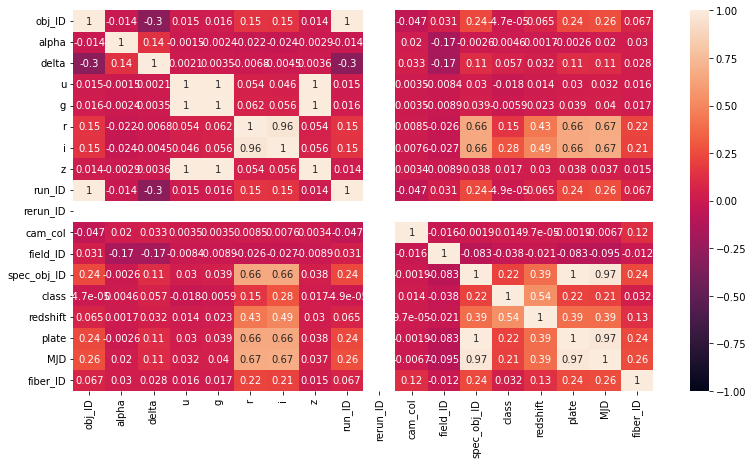

In [9]:
#####lana 

plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

In [2]:
# read the dataset
df = pd.read_csv("..\data\star_classification.csv")

# encode values for class column
df.replace({'class': {'GALAXY': 0, 'STAR': 1, 'QSO':2}}, inplace=True)

# # remove all columns containing ID at the end
# cleaned = df.drop(df.filter(regex='ID$').columns, axis=1)
# # drop the date column
# cleaned = cleaned.drop(['MJD',"plate"], axis=1)
# cleaned=cleaned.drop(79543)
# # make the X and y varialbes
# X = cleaned.drop('class', axis=1)
# y = cleaned['class']

# # split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [7]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0,0.455040,6751,56368,470


In [8]:
df.corr().style.background_gradient(cmap="coolwarm")

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,nan,-0.046997,0.031498,0.239461,-0.000047,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,nan,0.019582,-0.165577,-0.002553,0.004552,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,nan,0.032565,-0.173416,0.112329,0.056643,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,nan,0.003548,-0.008374,0.029997,-0.017701,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,nan,0.003508,-0.008852,0.039443,-0.005915,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,nan,0.008480,-0.026423,0.655245,0.150691,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,nan,0.007615,-0.026679,0.661641,0.284396,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,nan,0.003365,-0.008903,0.037813,0.017352,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,nan,-0.047098,0.031498,0.239460,-0.000049,0.065400,0.239459,0.262687,0.067165
rerun_ID,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
df.corr()["class"].sort_values()

In [189]:
from dis import dis
# cleaned = df.drop(['u','r','i','z','obj_ID','spec_obj_ID','MJD',], axis = 1)

# cleaned = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)
# cleaned = df.drop(df.filter(regex='ID$').columns, axis=1)
# drop the date column
# cleaned = df.drop(["u","r","z","alpha","delta","MJD","rerun_ID"], axis=1)
# cleaned = df.drop(["rerun_ID","obj_ID","run_ID","cam_col","field_ID","plate","spec_obj_ID","alpha","delta","g","u","fiber_ID"], axis=1)
#"alpha","delta",'run_ID',
cleaned=df.drop(79543)
# make the X and y varialbes
X = cleaned.drop('class', axis=1)
y = cleaned['class']
display(cleaned)


sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
cleaned.var()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0,0.455040,6751,56368,470


obj_ID         7.120744e+25
alpha          9.312754e+03
delta          3.859106e+02
u              5.067309e+00
g              4.150934e+00
r              3.440146e+00
i              3.090214e+00
z              3.118692e+00
run_ID         3.860199e+06
rerun_ID       0.000000e+00
cam_col        2.518293e+00
field_ID       2.220329e+04
spec_obj_ID    1.104915e+37
class          6.201753e-01
redshift       5.339351e-01
plate          8.716149e+06
MJD            3.270644e+06
fiber_ID       7.425530e+04
dtype: float64

In [ ]:
sns.displot(df["run_ID"]);


In [ ]:
sns.displot(df["field_ID"]);


In [ ]:
sns.displot(df["MJD"]);

In [ ]:
cleaned[cleaned["redshift"]>5]

In [ ]:
sns.displot(cleaned["alpha"]);

In [ ]:
sns.displot(cleaned["delta"]);

In [ ]:
sns.displot(x=cleaned["u"]);

In [ ]:
cleaned

In [ ]:
sns.displot(x=cleaned["g"]);

In [ ]:
sns.displot(cleaned["r"]);

In [ ]:
sns.displot(cleaned["i"]);

In [ ]:
sns.displot(cleaned["z"]);

In [ ]:
sns.countplot(x=cleaned["cam_col"]);

In [ ]:
sns.countplot(x=cleaned["class"]);

In [ ]:
sns.displot(cleaned["redshift"]);

In [ ]:
sns.displot(cleaned["plate"]);

# pre-processing

In [220]:
# Normalizing approach
yj = PowerTransformer(method="yeo-johnson")
scaler = StandardScaler()
# nzv_encoder = VarianceThreshold(threshold=0.1)
# pca = PCA(n_components=7)
# Normalize all numeric features
preprocessor = ColumnTransformer([("norm", yj, selector(dtype_include="number")),
                ("std_encode", scaler, selector(dtype_include="number")),
                # ("nzv_encoder", nzv_encoder, selector(dtype_include="number")),
                # ("pca_encode", pca, selector(dtype_include="number"))
                ])

# Random Forest Classifier

In [226]:
r_forest = RandomForestClassifier()
model_pipeline = Pipeline(steps=[
  ("norm", yj),
  ("std_encode",scaler),
  ("knn", r_forest),
])
# model_pipeline.fit(X_train,y_train)
# predicted = model_pipeline.predict(X_test)
# score = model_pipeline.score(X_test,y_test)
# model_pipeline_score = np.mean(score)
# model_pipeline_score
# 0.983

In [227]:
# define loss function
loss = 'accuracy'

# create 10 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# # fit model with 10-fold CV
# results = cross_val_score(model_pipeline, X_test, y_test, cv=kfold, scoring=loss)
# results.mean()
tsfs=SFS(model_pipeline,
k_features=17,
scoring=loss,
cv=kfold)
tsfs.fit(X,y)
tsfs.subsets_

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: Runtim

In [ ]:
print(classification_report(y_test, predicted))


# SVM

In [ ]:
svm_clf = svm.SVC(kernel='rbf', C=2, random_state=0)
model_pipeline = Pipeline(steps=[
  ("norm", yj),
  ("std_encode",scaler),
  ("knn", svm_clf),
])
# model_pipeline.fit(X_train,y_train)
# predicted = model_pipeline.predict(X_test)
# score = model_pipeline.score(X_test,y_test)
# model_pipeline_score = np.mean(score)
# model_pipeline_score
#0.977

0.973589278705071

In [ ]:
# define loss function
loss = 'accuracy'

# create 10 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# # fit model with 10-fold CV
# results = cross_val_score(model_pipeline, X_test, y_test, cv=kfold, scoring=loss)
# results.mean()
svmsfs=SFS(model_pipeline,
k_features=17,
scoring=loss,
cv=kfold)
tsfs.fit(X,y)
tsfs.subsets_

In [ ]:
print(classification_report(y_test, predicted)) 

# Logistic Regression

In [207]:
#best features cleaned = df.drop(["rerun_ID","obj_ID","run_ID","cam_col","field_ID","plate","spec_obj_ID","u"], axis=1)

log_reg=LogisticRegression(max_iter=1000)
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("log_reg", log_reg),
])
# model_pipeline.fit(X_train,y_train)
# predicted = model_pipeline.predict(X_test)
# score = model_pipeline.score(X_test,y_test)
# model_pipeline_score = np.mean(score)
# model_pipeline_score

In [ ]:
# define loss function
loss = 'accuracy'

# create 10 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 10-fold CV
results = cross_val_score(model_pipeline, X_test, y_test, cv=kfold, scoring=loss)
results.mean()

In [ ]:
print(classification_report(y_test, predicted)) 

In [ ]:
# Create grid of hyperparameter values
hyper_grid = {'log_reg__max_iter': range(100, 1000,100)}

# Tune a knn model using grid search
grid_search = GridSearchCV(model_pipeline, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)


In [ ]:
results.best_params_

# K-Nearest Neighbors


In [223]:
#  {'feature_idx': (4, 5, 6, 7, 13, 14),
#   'cv_scores': array([0.97300025, 0.97330866, 0.97364511, 0.975075  , 0.97473855]),
#   'avg_score': 0.9739535144531359,
#   'feature_names': ('g', 'r', 'i', 'z', 'redshift', 'plate')},
knn=KNeighborsClassifier(n_neighbors=3)
model_pipeline = Pipeline(steps=[
  ("norm", yj),
  ("std_encode",scaler),
  ("knn", knn),
])
# model_pipeline.fit(X_train,y_train)
# predicted = model_pipeline.predict(X_test)
# score = model_pipeline.score(X_test,y_test)
# model_pipeline_score = np.mean(score)
# model_pipeline_score


In [225]:
# define loss function
loss = 'accuracy'

# create 10 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# # fit model with 10-fold CV
# results = cross_val_score(model_pipeline, X_test, y_test, cv=kfold, scoring=loss)
# results.mean()
sfs=SFS(model_pipeline,
k_features=17,
scoring=loss,
cv=kfold)
sfs.fit(X,y)
sfs.subsets_

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: Runtim

{1: {'feature_idx': (13,),
  'cv_scores': array([0.93405669, 0.9333838 , 0.93526229, 0.93627162, 0.93419688]),
  'avg_score': 0.934634255754619,
  'feature_names': ('redshift',)},
 2: {'feature_idx': (4, 13),
  'cv_scores': array([0.96554238, 0.96728068, 0.96579471, 0.96800964, 0.96618723]),
  'avg_score': 0.9665629293184177,
  'feature_names': ('g', 'redshift')},
 3: {'feature_idx': (4, 6, 13),
  'cv_scores': array([0.97095354, 0.97207503, 0.97218718, 0.97459837, 0.97252362]),
  'avg_score': 0.9724675470322708,
  'feature_names': ('g', 'i', 'redshift')},
 4: {'feature_idx': (4, 6, 13, 14),
  'cv_scores': array([0.97252362, 0.97286007, 0.9733367 , 0.97487874, 0.9728881 ]),
  'avg_score': 0.9732974458182634,
  'feature_names': ('g', 'i', 'redshift', 'plate')},
 5: {'feature_idx': (4, 5, 6, 13, 14),
  'cv_scores': array([0.97353296, 0.97330866, 0.97367314, 0.97428996, 0.97370118]),
  'avg_score': 0.9737011803628004,
  'feature_names': ('g', 'r', 'i', 'redshift', 'plate')},
 6: {'feature_

In [ ]:
print(classification_report(y_test, predicted)) 

# deep learining

In [ ]:
from dis import dis

# cleaned = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)
cleaned = df.drop(['u','r','i','z','obj_ID','spec_obj_ID','MJD'], axis = 1)

# cleaned = df.drop(df.filter(regex='ID$').columns, axis=1)
# drop the date column
# cleaned = cleaned.drop(["MJD","plate","cam_col"], axis=1)
cleaned=cleaned.drop(79543)
# make the X and y varialbes
X = cleaned.drop('class', axis=1)
y = cleaned['class']
display(cleaned)


sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

from tensorflow.keras import utils
# y = utils.to_categorical(y)
# y_train = utils.to_categorical(y_train)
# y_test = utils.to_categorical(y_test)


In [ ]:

# define the keras model
model = Sequential()
model.add(Dense(units=64, input_dim=20, activation="tanh"))
model.add(Dense(units=64,  activation="tanh"))
model.add(Dense(units=32,  activation="tanh"))
model.add(Dense(units=3, activation='softmax'))

# compile the keras model
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer="rmsprop",
    metrics='accuracy'
)
# fit the model
# model.fit(X, y, epochs=20, validation_split=0.2)
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("model", model),
])
m1=model_pipeline.fit(X_train,y_train, model__epochs=20, model__validation_split=0.2,model__batch_size=32,)

In [ ]:
predicted=m1.predict(X_test)
y_classes = predicted.argmax(axis=-1)

# model_pipeline.transform(X_test)
print(classification_report(y_test, y_classes)) 

In [ ]:
# define loss function
loss = 'accuracy'

# create 10 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 10-fold CV
results = cross_val_score(model_pipeline, X_train, y_train, cv=kfold, scoring=loss)
results

In [ ]:
# hyper_grid = {'n_neighbors': range(2, 26)}
# grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
# results = grid_search.fit(X_train, y_train)

# k-means clustring | trash

In [ ]:
model = sklearn.cluster.KMeans(n_clusters=3,random_state=123)
model

In [ ]:
galaxy = cleaned[cleaned["class"]==0].drop("class",axis=1)
galaxy_centers = map(lambda a: a/galaxy.shape[0],galaxy.sum())
galaxy_centers= np.array(list(galaxy_centers))
galaxy_centers


STAR = cleaned[cleaned["class"]==1].drop("class",axis=1)
STAR_centers = map(lambda a: a/STAR.shape[0],STAR.sum())
STAR_centers= np.array(list(STAR_centers))
STAR_centers



QSO = cleaned[cleaned["class"]==2].drop("class",axis=1)
QSO_centers = map(lambda a: a/QSO.shape[0],QSO.sum())
QSO_centers= np.array(list(QSO_centers))
QSO_centers



In [ ]:
m1=model.fit([galaxy_centers,STAR_centers,QSO_centers])
m1.labels_

In [ ]:
pred= m1.predict(X_test)
print(classification_report(y_test, pred)) 